<a href="https://colab.research.google.com/github/Snehay23/Credit-Card-Fraud-Prediction/blob/main/Credit_Card.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing necessary Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
card=pd.read_csv('credit_card.csv')

In [ ]:
card.sample(5)

,V1,V2,V3,V4,V5,Amount,Class
143,0.662131,0.609138,0.404295,0.298158,0.892068,161.762307,0.0
847,-1.067620,-1.347126,-0.230401,-0.279810,-0.525631,186.328565,0.0
714,-1.214189,-1.311836,3.109919,-1.075312,0.203236,58.373951,0.0
811,-0.889514,-2.499406,-0.175854,0.846771,-0.243061,420.548085,0.0
262,0.261055,0.238789,1.203884,0.018402,0.448636,413.805131,0.0


In [ ]:
card.isnull().sum()

,0
V1,0
V2,0
V3,0
V4,0
V5,0
Amount,0
Class,0


In [ ]:
card.describe()

,V1,V2,V3,V4,V5,Amount,Class
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.022887,0.061579,0.003728,-0.020524,-0.051598,258.849015,0.010000
std,0.975938,1.000535,0.977687,1.013361,0.999238,178.640412,0.099549
min,-3.241267,-2.940389,-3.019512,-2.929449,-3.176704,0.120502,0.000000
25%,-0.637475,-0.608245,-0.648000,-0.737420,-0.691214,125.898334,0.000000
50%,0.026488,0.054298,-0.010695,-0.001359,-0.009567,246.269883,0.000000
75%,0.649083,0.708135,0.666819,0.657407,0.634238,383.157937,0.000000
max,3.852731,3.193108,3.926238,3.243093,3.152057,1916.061917,1.000000


In [ ]:
card.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      1000 non-null   float64
 1   V2      1000 non-null   float64
 2   V3      1000 non-null   float64
 3   V4      1000 non-null   float64
 4   V5      1000 non-null   float64
 5   Amount  1000 non-null   float64
 6   Class   1000 non-null   float64
dtypes: float64(7)
memory usage: 54.8 KB


In [3]:
# Analyzing Class Distribution
fraud = card[card['Class'] == 1]
valid = card[card['Class'] == 0]
outlierFraction = len(fraud)/float(len(valid))
print(outlierFraction)
print('Fraud Cases: {}'.format(len(card[card['Class'] == 1])))
print('Valid Transactions: {}'.format(len(card[card['Class'] == 0])))

0.010101010101010102
Fraud Cases: 10
Valid Transactions: 990


In [12]:
# Exploring Transaction Amounts
print("Amount details of the fraudulent transaction")
fraud.Amount.describe()

Amount details of the fraudulent transaction


,Amount
count,10.000000
mean,1234.024613
std,440.571452
min,574.671502
25%,934.178417
50%,1186.077678
75%,1436.121602
max,1916.061917


In [5]:
valid.Amount.describe()

,Amount
count,990.000000
mean,248.998756
std,144.069918
min,0.120502
25%,125.194892
50%,243.211856
75%,379.975896
max,499.603649


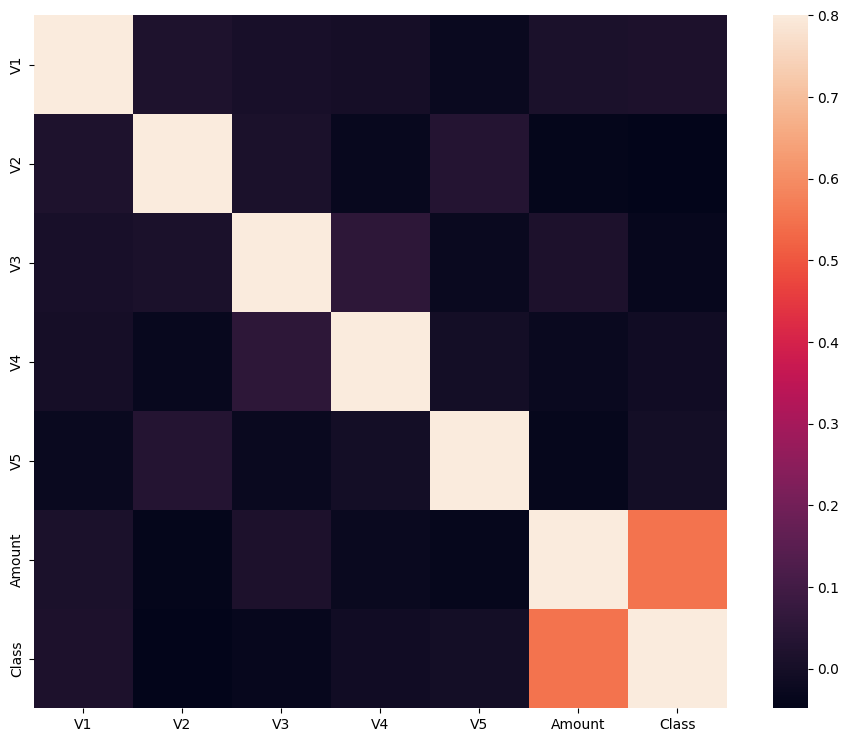

In [7]:
# Plotting Correlation Matrix
corrmat = card.corr()
fig = plt.figure(figsize = (12, 9))
sns.heatmap(corrmat, vmax = .8, square = True)
plt.show()

In [8]:
X = card.drop(['Class'], axis = 1)
Y = card["Class"]
print(X.shape)
print(Y.shape)

xData = X.values
yData = Y.values

from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(
        xData, yData, test_size = 0.2, random_state = 42)

(1000, 6)
(1000,)


In [10]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(xTrain, yTrain)
yPred = rfc.predict(xTest)

Model Evaluation Metrics:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-Score: 1.0000
Matthews Correlation Coefficient: 1.0000


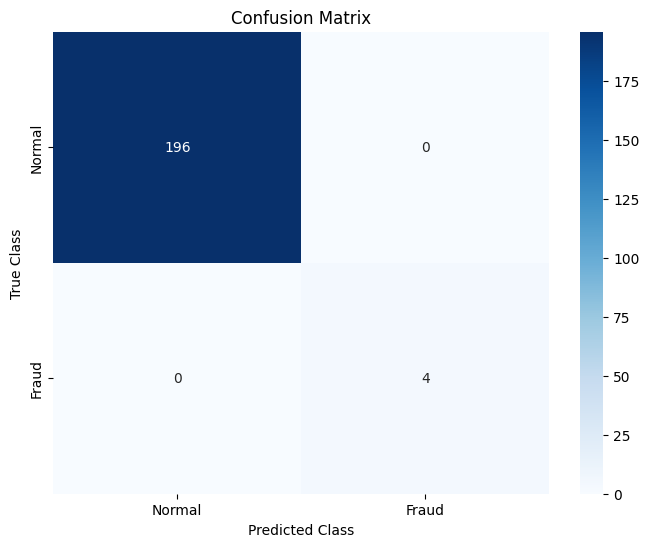

In [11]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef, confusion_matrix
accuracy = accuracy_score(yTest, yPred)
precision = precision_score(yTest, yPred)
recall = recall_score(yTest, yPred)
f1 = f1_score(yTest, yPred)
mcc = matthews_corrcoef(yTest, yPred)

print("Model Evaluation Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"Matthews Correlation Coefficient: {mcc:.4f}")

conf_matrix = confusion_matrix(yTest, yPred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Normal', 'Fraud'], yticklabels=['Normal', 'Fraud'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()